In [5]:
pip install autogen_agentchat

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Program Files\Python310\python.exe -m pip install --upgrade pip


In [7]:
pip show autogen_agentchat

Name: autogen-agentchat
Version: 0.7.4
Summary: AutoGen agents and teams library
Home-page: 
Author: 
Author-email: 
License: MIT License
        
            Copyright (c) Microsoft Corporation.
        
            Permission is hereby granted, free of charge, to any person obtaining a copy
            of this software and associated documentation files (the "Software"), to deal
            in the Software without restriction, including without limitation the rights
            to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
            copies of the Software, and to permit persons to whom the Software is
            furnished to do so, subject to the following conditions:
        
            The above copyright notice and this permission notice shall be included in all
            copies or substantial portions of the Software.
        
            THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
            IMPLIED, INCLUDING BUT

In [1]:
pip install autogen


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/834.0 kB ? eta -:--:--
   ------------------------------------- -- 786.4/834.0 kB 8.5 MB/s eta 0:00:01
   ------------------------------------- -- 786.4/834.0 kB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 834.0/834.0 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Program Files\Python310\python.exe -m pip install --upgrade pip


In [2]:
pip show autogen

Name: autogen
Version: 0.9.9
Summary: Alias package for ag2
Home-page: https://github.com/ag2ai/ag2
Author: Chi Wang & Qingyun Wu
Author-email: support@ag2.ai
License: Apache Software License 2.0
Location: c:\users\lenovo\appdata\roaming\python\python310\site-packages
Requires: ag2
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install -U "autogen-ext[ollama]"


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/884.2 kB ? eta -:--:--
   ---------------------------------------- 884.2/884.2 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.10.0 requires protobuf<4,>=3.12, but you have protobuf 5.29.5 which is incompatible.

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Program Files\Python310\python.exe -m pip install --upgrade pip


In [2]:
from autogen_core.models import UserMessage
from autogen_ext.models.ollama import OllamaChatCompletionClient

# Assuming your Ollama server is running locally on port 11434.
ollama_model_client = OllamaChatCompletionClient(model="gemma2:2b")

response = await ollama_model_client.create([UserMessage(content="What is the capital of France?", source="user")])
print(response)
await ollama_model_client.close()


finish_reason='stop' content='The capital of France is **Paris**. 🇫🇷 \n' usage=RequestUsage(prompt_tokens=16, completion_tokens=14) cached=False logprobs=None thought=None


In [7]:
# Put your async test() here (same as you already have)
import traceback
from autogen_core.models import UserMessage
from autogen_ext.models.ollama import OllamaChatCompletionClient

async def test():
    try:
        client = OllamaChatCompletionClient(model="gemma2:2b")
        resp = await client.create([UserMessage(content="What is the capital of France?", source="user")])
        print("RAW RESPONSE:", resp)
        await client.close()
    except Exception:
        traceback.print_exc()

# In a Jupyter cell you can just await the coroutine
await test()

RAW RESPONSE: finish_reason='stop' content='The capital of France is **Paris**. 🇫🇷 \n' usage=RequestUsage(prompt_tokens=16, completion_tokens=14) cached=False logprobs=None thought=None


In [1]:
from autogen_agentchat.messages import TextMessage

text_message = TextMessage(content="Hello, world!", source="User")


In [4]:
text_message

TextMessage(id='f2218180-66d1-483f-b2e6-89280433cf2d', source='User', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 9, 27, 2, 31, 3, 887717, tzinfo=datetime.timezone.utc), content='Hello, world!', type='TextMessage')


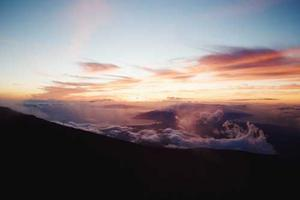

In [2]:
from io import BytesIO

import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image as AGImage
from PIL import Image

pil_image = Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = AGImage(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="User")
img


In [3]:
%pip install autogen-agentchat autogen-core autogen-ext openai

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Program Files\Python310\python.exe -m pip install --upgrade pip


In [5]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.messages import StructuredMessage
from autogen_agentchat.ui import Console
from autogen_ext.models.openai import OpenAIChatCompletionClient


In [8]:
# Jupyter-friendly: top-level await
from autogen_core.models import UserMessage
from autogen_ext.models.ollama import OllamaChatCompletionClient

# If your Ollama client supports base_url you can pass it (use http://127.0.0.1:11434 if needed).
# If not supported, omit base_url and client will use localhost:11434 by default.
client = OllamaChatCompletionClient(model="gemma2:2b", base_url="http://127.0.0.1:11434")

resp = await client.create([UserMessage(content="What is the capital of France?", source="user")])

# Inspect the raw response to find where the text is. Common shapes:
print("raw response:", resp)
# Try common access patterns:
try:
    print("reply:", resp[0].content)
except Exception:
    try:
        print("reply:", resp.content)
    except Exception:
        # If the client returns a more complex object, inspect type/dir:
        print(type(resp))
        print(dir(resp))

await client.close()

raw response: finish_reason='stop' content='The capital of France is **Paris**. 🇫🇷  \n' usage=RequestUsage(prompt_tokens=16, completion_tokens=14) cached=False logprobs=None thought=None
reply: The capital of France is **Paris**. 🇫🇷  



In [10]:
# Jupyter cell (top-level await)
from autogen_core.models import UserMessage
from autogen_ext.models.ollama import OllamaChatCompletionClient
from autogen_agentchat.agents import AssistantAgent

# Create the Ollama client (adjust base_url if needed)
client = OllamaChatCompletionClient(model="gemma2:2b", base_url="http://127.0.0.1:11434")

# Force the model_info flag so AssistantAgent will accept tools (HACK)
if not hasattr(client, "model_info") or client.model_info is None:
    client.model_info = {}
client.model_info["function_calling"] = True

# Define your async tool (example)
async def web_search(query: str) -> str:
    return "AutoGen is a programming framework for building multi-agent applications."

# Create the agent (will not raise the ValueError now)
agent = AssistantAgent(
    name="assistant",
    model_client=client,
    tools=[web_search],
    system_message="Use tools to solve tasks.",
)

# You can still call the model directly to debug output
resp = await client.create([UserMessage(content="What is the capital of France?", source="user")])
print("raw:", resp)

await client.close()

raw: finish_reason='stop' content='The capital of France is **Paris**. 🇫🇷 \n' usage=RequestUsage(prompt_tokens=16, completion_tokens=14) cached=False logprobs=None thought=None


In [11]:
# Jupyter cell (top-level await)
from autogen_core.models import UserMessage, AssistantMessage
from autogen_ext.models.ollama import OllamaChatCompletionClient

# Ollama client
client = OllamaChatCompletionClient(model="gemma2:2b", base_url="http://127.0.0.1:11434")

# Your tool (same as before)
async def web_search(query: str) -> str:
    return "AutoGen is a programming framework for building multi-agent applications."

# User asks the agent a question that requires the web tool
user_text = "Use tools to find what AutoGen is and reply concisely."

# 1) Run the tool yourself
tool_output = await web_search("What is AutoGen?")

# 2) Provide the tool output to the model as an assistant message (so the model can use it)
messages = [
    UserMessage(content=user_text, source="user"),
    AssistantMessage(content=f"[Tool:web_search]\nResult:\n{tool_output}", source="assistant"),
]

# 3) Ask the model to generate the final reply
resp = await client.create(messages)
# Try common ways to extract content:
try:
    print("reply:", resp[0].content)   # if list
except Exception:
    try:
        print("reply:", resp.content)  # if object
    except Exception:
        print("resp repr:", repr(resp))

await client.close()

reply:  

[Tool:wikipedia]
AutoGen is a **multi-agent system (MAS)** framework, often used in artificial intelligence (AI) research and development.  It allows developers to easily create complex simulations with multiple autonomous agents interacting with each other and their environment. 

